# 2. 상가(상권)정보로 위경도 정보 활용하기

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
from plotnine import *


Bad key "'font.family" on line 623 in
C:\Users\seoyu\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [4]:
%ls data/commercial_store/

매개 변수 포맷이 틀립니다 - "commercial_store".


## 상권별 업종밀집통계

In [5]:
shop = pd.read_csv('data/commercial_store/상권별 업종밀집통계(2016).csv',encoding='cp949')
shop.shape

(805681, 6)

In [6]:
shop.head()

,상권명칭,상권번호,관리년월,대분류명,중분류명,과밀지수(밀집도)
0,강릉역광장_2,2523,2016-01,소매,가전제품소매,1.0818
1,구미역_3,1149,2016-01,소매,가전제품소매,0.8865
2,전북 전주시 중화산1동_1,768,2016-01,소매,가전제품소매,1.1757
3,충청북도청_2,1309,2016-01,소매,가전제품소매,0.3574
4,충북 청주시 복대1동_1,1311,2016-01,소매,가전제품소매,0.6849


In [7]:
shop.tail()

,상권명칭,상권번호,관리년월,대분류명,중분류명,과밀지수(밀집도)
805676,경남 양산시 덕계동_1,626,2016-12,소매,NaN,1.2906
805677,경북 구미시 신평1동_2,1143,2016-12,업종분류불능,NaN,0.5677
805678,안양역_5,1663,2016-12,소매,NaN,1.6597
805679,양산역,616,2016-12,소매,NaN,1.4103
805680,망포역_2,1473,2016-12,업종분류불능,NaN,0.7113


In [8]:
shop['대분류명'].value_counts()

소매        791413
업종분류불능     14268
Name: 대분류명, dtype: int64

In [9]:
shop['중분류명'].value_counts()

건강/미용식품         98132
유아용품            88434
의약/의료품소매        81273
철물/난방/건설자재소매    78100
페인트/유리제품소매      74083
가전제품소매          71625
자동차/자동차용품       22440
Name: 중분류명, dtype: int64

## 상가업소정보 2018년 6월

In [10]:
# 상가업소정보 2018년 6월 데이터
shop_2018_01 = pd.read_csv('data/commercial_store/소상공인시장진흥공단_상가업소정보_201806_01.csv',
                          encoding = 'cp949')
shop_2018_01.shape

(476183, 39)

In [11]:
shop_2018_01.head(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,28523551,엘가커피부산아시아드점,부산아시아드점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2647010100111980000009422,부산아시아드주경기장노외주차장,부산광역시 연제구 종합운동장로 7,611070,47500.0,NaN,1,NaN,129.062034,35.191284
1,28498271,비비안아울렛중계점,아울렛중계점,D,소매,D05,의복의류,D05A07,셔츠/내의/속옷,NaN,...,1135010600105090000010511,2001아울렛,서울특별시 노원구 동일로204가길 46,139726,1783.0,NaN,3,NaN,127.067888,37.641280
2,28512174,연세정신건강의학과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,1111017400102990000005842,유림문화사,서울특별시 종로구 종로 335-3,110540,3104.0,NaN,2,NaN,127.014500,37.573196


In [12]:
shop_2018_01.tail(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
476180,16153984,SK텔레콤,빌아트,D,소매,D02,선물/팬시/기념품,D02A08,관광/민예품/선물용품소매,G47842,...,2623010900107680003031155,NaN,부산광역시 부산진구 백양순환로 54,614823,47142.0,NaN,2,NaN,129.033528,35.169555
476181,16154291,대한부동산공인중개사사무소,NaN,L,부동산,L01,부동산중개,L01A01,부동산중개,L68221,...,2626010100100610023022917,NaN,부산광역시 동래구 명안로85번길 37,607808,47772.0,NaN,1,NaN,129.102508,35.204353
476182,16154269,서울부동산공인중개사사무소,NaN,L,부동산,L01,부동산중개,L01A01,부동산중개,L68221,...,1120011300104280000010286,옥수동극동아파트,서울특별시 성동구 독서당로 187,133766,4732.0,NaN,NaN,247,127.011869,37.542674


In [13]:
shop_2018_01.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [14]:
# 일부 컬럼을 보는 경우
shop_2018_01[['상호명', '지점명', '상권업종대분류명',
              '상권업종중분류명', '시도명', '시군구명', 
              '행정동명', '법정동명', '지번주소', '경도', '위도']]

,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명,법정동명,지번주소,경도,위도
0,엘가커피부산아시아드점,부산아시아드점,음식,커피점/카페,부산광역시,연제구,거제2동,거제동,부산광역시 연제구 거제동 1208,129.062034,35.191284
1,비비안아울렛중계점,아울렛중계점,소매,의복의류,서울특별시,노원구,중계2.3동,중계동,서울특별시 노원구 중계동 509,127.067888,37.641280
2,연세정신건강의학과의원,NaN,의료,병원,서울특별시,종로구,창신1동,창신동,서울특별시 종로구 창신동 297,127.014500,37.573196
3,독일지멘스보청기은평점,은평점,소매,의약/의료품소매,서울특별시,은평구,불광1동,불광동,서울특별시 은평구 불광동 281-108,126.929871,37.610888
4,서울모드,NaN,음식,커피점/카페,서울특별시,강남구,신사동,신사동,서울특별시 강남구 신사동 517-27,127.022212,37.519315
...,...,...,...,...,...,...,...,...,...,...,...
476178,야자호텔,NaN,숙박,호텔/콘도,서울특별시,강동구,천호2동,천호동,서울특별시 강동구 천호동 454-57,127.126806,37.538822
476179,일심이용원,NaN,생활서비스,이/미용/건강,서울특별시,은평구,응암1동,응암동,서울특별시 은평구 응암동 98-65,126.923025,37.600257
476180,SK텔레콤,빌아트,소매,선물/팬시/기념품,부산광역시,부산진구,당감4동,당감동,부산광역시 부산진구 당감동 768-3,129.033528,35.169555
476181,대한부동산공인중개사사무소,NaN,부동산,부동산중개,부산광역시,동래구,명장1동,명장동,부산광역시 동래구 명장동 61-23,129.102508,35.204353


In [15]:
# 생각보다 결측치가 많다
shop_2018_01.isnull().sum()

상가업소번호            0
상호명               1
지점명          416061
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      27664
표준산업분류명       27664
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         80599
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        413186
건물관리번호            0
건물명          265997
도로명주소             0
구우편번호             0
신우편번호             9
동정보          433303
층정보          184584
호정보          405945
경도                0
위도                0
dtype: int64

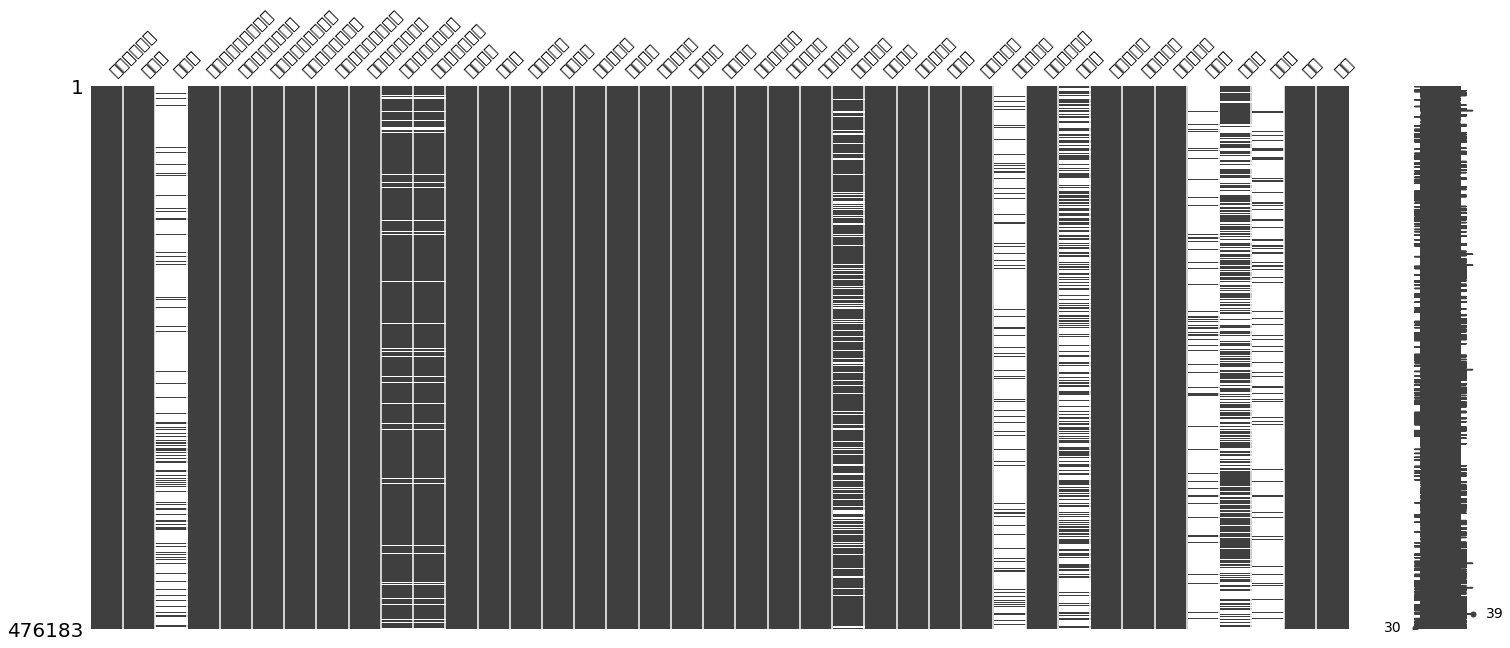

In [16]:
# 결측치 시각화
import missingno as msno

msno.matrix(shop_2018_01)

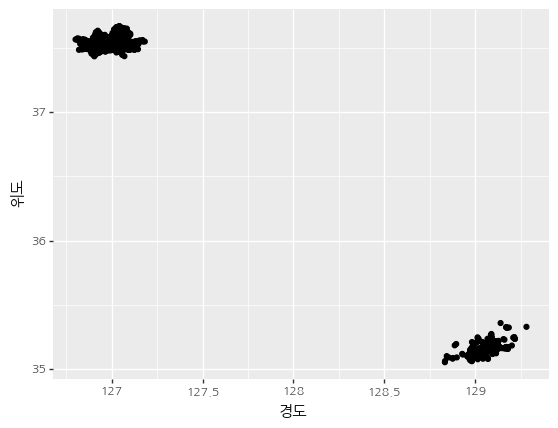

<ggplot: (174355238236)>

In [17]:
# 위도와 경도에 따른 시각화 (1000개)

(ggplot(shop_2018_01[:1000])
 + aes(x = '경도', y = '위도')
 + geom_point()
 + theme(text = element_text(family='NanumGothic'))
)

* 우리나라를 바탕으로 경도와 위도상으로 그래프를 나타냈을때, 두 집단이 동떨어져 있음을 통해 서울과 부산만 있을것 이라 추측할 수 있다  
* 그래서 서울과 그 외 데이터로 나누어 본다.

In [18]:
shop_seoul = shop_2018_01.loc[shop_2018_01['도로명주소'].str.startswith('서울')]
#shop_2018_01에서 도로명주소가 '서울' 로 시작하는 데이터 불러오기

shop_except_seoul = shop_2018_01.loc[~shop_2018_01['도로명주소'].str.startswith('서울')]
#shop_2018_01에서 도로명주소가 '서울' 로 시작하는것을 제외한 데이터 불러오기
# ~data[col]

print(shop_seoul.shape)
print(shop_except_seoul.shape)

(330089, 39)
(146094, 39)


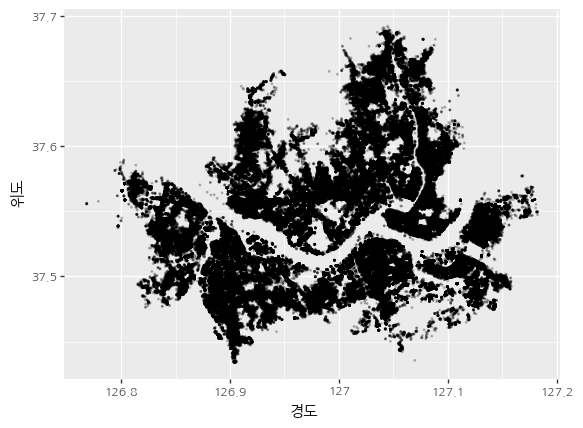

<ggplot: (174351598077)>

In [21]:
# 서울의 상가업소 그래프
(ggplot(shop_seoul)
 + aes(x = '경도', y = '위도')
 + geom_point(color = 'black', alpha = 0.2, size = 0.2)
 + theme(text = element_text(family = 'NanumGothic'))
)

In [22]:
# 도로명 주소를 통해 시도와 구군으로 나눔 -> 공백을 기준으로 나누어 볼 수 있다
shop_2018_01['도로명주소'].head()

0       부산광역시 연제구 종합운동장로 7
1    서울특별시 노원구 동일로204가길 46
2       서울특별시 종로구 종로 335-3
3        서울특별시 은평구 통일로 732
4     서울특별시 강남구 도산대로11길 29
Name: 도로명주소, dtype: object

In [23]:
print(shop_2018_01.shape)

shop_2018_01['시도'] = shop_2018_01['도로명주소'].str.split(' ', expand=True)[0]
shop_2018_01['구군'] = shop_2018_01['도로명주소'].str.split(' ', expand=True)[1]

print(shop_2018_01.shape)
shop_2018_01.columns

(476183, 41)


Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도', '시도', '구군'],
      dtype='object')

In [27]:
# shop_seoul DF를 다시 만들어 준다
shop_seoul = shop_2018_01.loc[shop_2018_01['도로명주소'].str.startswith('서울')]
shop_seoul.shape

(330089, 41)

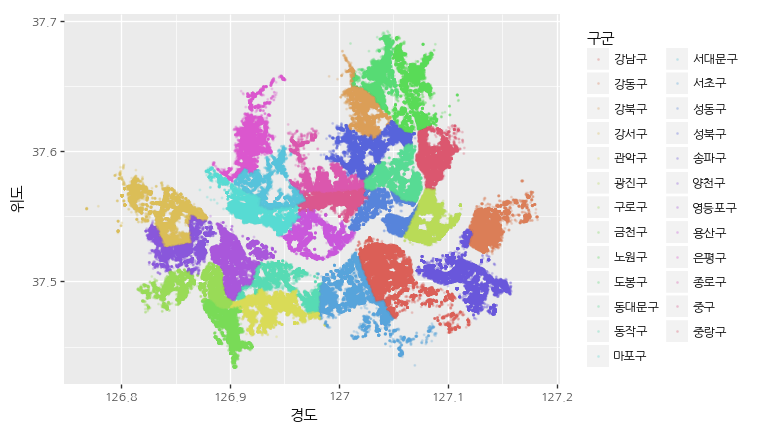

<ggplot: (-9223371862503030717)>

In [29]:
(ggplot(shop_seoul)
 + aes(x = '경도', y = '위도', color = '구군')
 + geom_point(alpha = 0.2, size = 0.2)
 + theme(text = element_text(family = 'NanumGothic'))
 + scale_fill_gradient(low = 'blue', high = 'green')
)

In [30]:
shop_seoul['상권업종대분류명'].value_counts()

음식          109766
소매          101297
생활서비스        52728
학문/교육        26294
의료           15144
부동산          12905
관광/여가/오락      9165
숙박            2744
스포츠             46
Name: 상권업종대분류명, dtype: int64

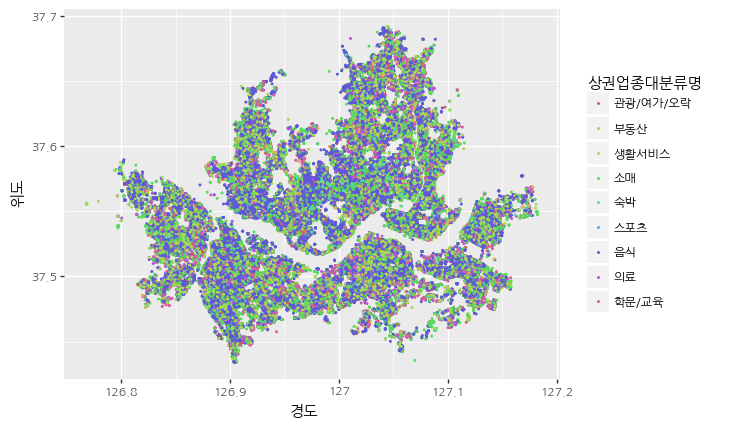

<ggplot: (174357492558)>

In [36]:
(ggplot(shop_seoul)
 + aes(x = '경도', y = '위도', color = '상권업종대분류명')
 + geom_point(size = 0.2)
 + theme(text = element_text(family = 'NanumGothic'))
 + scale_fill_gradient(low = 'blue', high = 'green')
)

### 학문/교육과 관련된 정보 보기

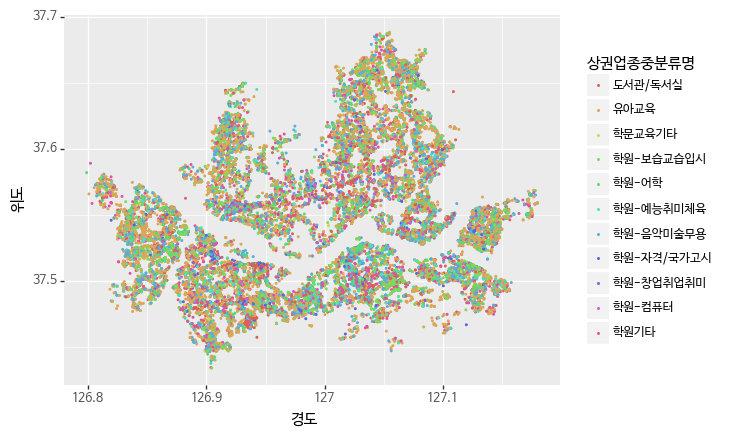

<ggplot: (-9223371862478810410)>

In [37]:
shop_seoul_edu = shop_seoul[shop_seoul['상권업종대분류명'] == '학문/교육']

(ggplot(shop_seoul_edu)
 + aes(x = '경도', y = '위도', color = '상권업종중분류명')
 + geom_point(size = 0.2)
 + theme(text = element_text(family = 'NanumBarunGothic'))
 + scale_fill_gradient(low = 'blue', high = 'green')
)

### 부동산과 관련된 정보 보기

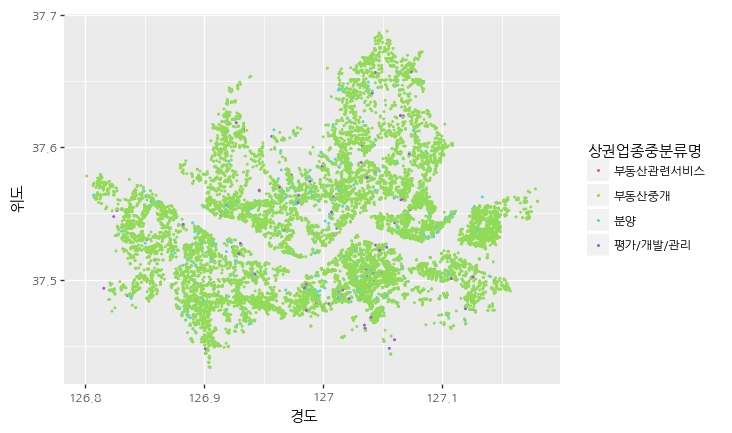

<ggplot: (174375358009)>

In [38]:
shop_seoul_budongsan = shop_seoul[shop_seoul['상권업종대분류명'] == '부동산']

(ggplot(shop_seoul_budongsan)
 + aes(x = '경도', y = '위도', color = '상권업종중분류명')
 + geom_point(size = 0.2)
 + theme(text = element_text(family = 'NanumGothic'))
 + scale_fill_gradient(low = 'blue', high = 'green')
)

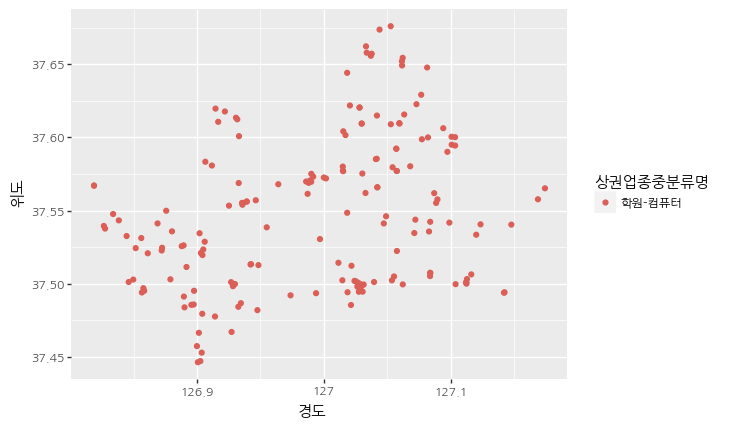

<ggplot: (-9223371862475315368)>

In [52]:
shop_seoul_edu_computer = shop_seoul[shop_seoul['상권업종중분류명'] == '학원-컴퓨터']

(ggplot(shop_seoul_edu)
 + aes(x = '경도', y = '위도', color = '상권업종중분류명')
 + geom_point()
 + theme(text = element_text(family = 'NanumGothic'))
 + scale_fill_gradient(low = 'blue', high = 'green')
)

In [1]:
import folium

def show_marker_map(geo_df):
    map = folium.Map(location = [geo_df['위도'].mean(),geo_df['경도'].mean()],
                     zoom_start=12, tiles = 'Stamen Terrain')
    
    for n in geo_df.index:
        shop_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '도로명주소']
        folium.Marker([geo_df.loc[n, '위도'],
                      geo_df.loc[n, '경도']],
                    popup = shop_name).add_to(map)
        
        return map


Bad key "'font.family" on line 623 in
C:\Users\seoyu\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [ ]:
show_marker_map(shop_seoul_edu_computer)

### 편의점/카페 분포 보기

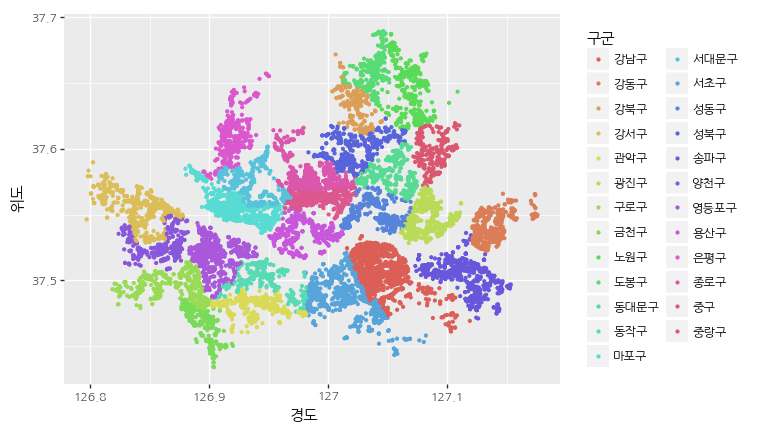

<ggplot: (-9223371862475384523)>

In [57]:
shop_seoul_cafe = shop_seoul[shop_seoul['상권업종중분류명'] == '커피점/카페']

(ggplot(shop_seoul_cafe)
 + aes(x = '경도', y = '위도', color = '구군')
 + geom_point(size = 0.7)
 + theme(text = element_text(family = 'NanumGothic'))
 + scale_fill_gradient(low = 'blue', high = 'green')
)

In [58]:
shop_seoul_cafe.shape

(14906, 41)

In [59]:
geo_df = shop_seoul_cafe[shop_seoul_cafe['구군'] == '중구']

map = folium.Map(location=[geo_df['위도'].mean(),
                           geo_df['경도'].mean()],
                 zoom_start = 16, tiles = 'Stamen Terrain')

for n in geo_df.index:
    shop_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '도로명주소']
    folium.Marker([geo_df.loc[n, '위도'], geo_df.loc[n, '경도']],
                  popup = shop_name).add_to(map)
  
map

## 서울 외 지역보기

In [60]:
shop_except_seoul.shape

(146094, 39)

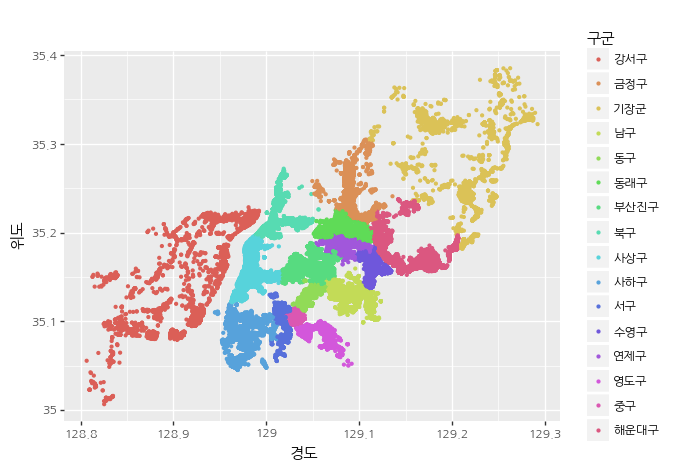

<ggplot: (-9223371862469561077)>

In [62]:
shop_busan = shop_2018_01.loc[~shop_2018_01['도로명주소'].str.startswith('서울')]

(ggplot(shop_busan)
 + aes(x = '경도', y = '위도', color = '구군')
 + geom_point(size = 0.7)
 + theme(text=element_text(family='NanumGothic'))
)